# Using Random Forest for Regression

# Problem Definition

The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

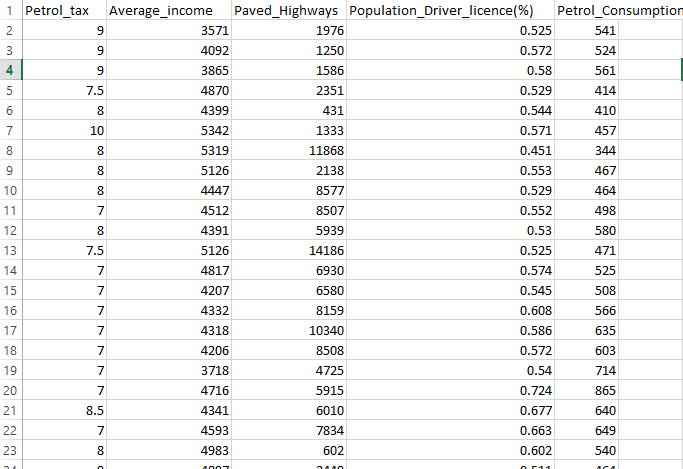

To solve this regression problem we will use the random forest algorithm via the Scikit-Learn Python library. We will follow the traditional machine learning pipeline to solve this problem. 

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np

NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow us to store and manipulate tabular data in rows of observations and columns of variables.

In [2]:
# importing the dataset

dataset = pd.read_csv('E:\Online Courses, Internship and more\Intellify\petrol_consumption.csv')

The dataset has been downloaded into the "Intellify" folder of the "Online Courses, Internship and more" folder within the "E" drive. You'll need to change the file path according to your own setup.

In [3]:
# looking at the dimensions of the dataset

dataset.shape

(48, 5)

Thus, we have 48 rows and 5 columns in the dataset. The 5 columns comprise the 4 input features and 1 target variable.

To get a high-level view of what the dataset looks like, we execute the following command:

In [3]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


dataset.head() returns the first 5 rows of the dataset. We can also specify the number of rows that we want to see by passing a number inside the head() function, for eg. dataset.head(10) will display the first 10 rows of the dataset

In [5]:
# taking a look at the descriptive statistics

dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


We can see that the values in our dataset are not very well scaled. We will scale them down before training the algorithm.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

Preparing Data For Training

Two tasks will be performed in this section. The first task is to divide data into 'attributes' and 'label' sets. The resultant data is then divided into training and test sets.

The following script divides data into attributes and labels:

In [4]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

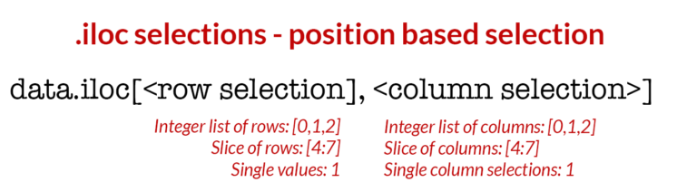

Alternatively, we can split the dataset by:

X = dataset.drop(['Petrol_Consumption'],axis=1)

y = dataset['Petrol_Consumption']

Finally, let's divide the data into training and testing sets:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Feature Scaling

We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Algorithm

Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem. Execute the following code:

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [7]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs.

Evaluating the Algorithm

The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. Execute the following code to find these values:

In [8]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


With 20 trees, the root mean squared error is 64.93 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

If the number of estimators is changed to 200, the results are as follows:

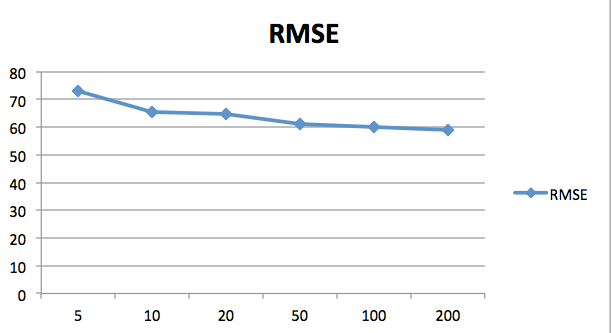

You can see that the error values decreases with the increase in number of estimator. After 200 the rate of decrease in error diminishes, so therefore 200 is a good number for n_estimators. You can play around with the number of trees and other parameters to see if you can get better results on your own.

# Using Random Forest for Classification

# Problem Definition

The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

This is a binary classification problem and we will use a random forest classifier to solve this problem. Steps followed to solve this problem will be similar to the steps performed for regression.

In [32]:
# importing the necessary libraries

import pandas as pd
import numpy as np

NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow us to store and manipulate tabular data in rows of observations and columns of variables.

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.



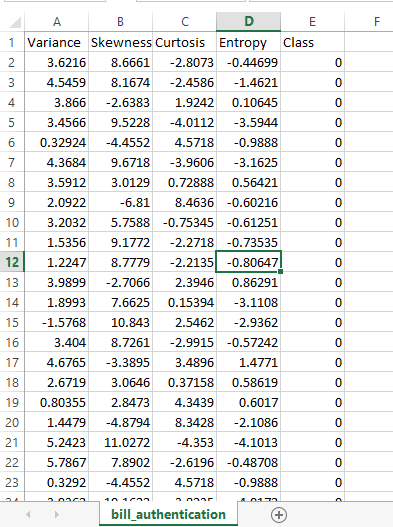

In [33]:
# importing the dataset

dataset = pd.read_csv('E:\Online Courses, Internship and more\Intellify\\bill_authentication.csv')

The dataset has been downloaded into the "Intellify" folder of the "Online Courses, Internship and more" folder within the "E" drive. You'll need to change the file path according to your own setup.

To get a high level view of the dataset, execute the following command:

In [12]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

As was the case with regression dataset, values in this dataset are not very well scaled. The dataset will be scaled before training the algorithm.

Preparing Data For Training

The following code divides data into attributes and labels:

In [34]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

The following code divides data into training and testing sets:

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling

As with before, feature scaling works the same way:

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Training the Algorithm

And again, now that we have scaled our dataset, we can train our random forests to solve this classification problem. To do so, execute the following code:

In [37]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In case of regression we used the RandomForestRegressor class of the sklearn.ensemble library. For classification, we will RandomForestClassifier class of the sklearn.ensemble library. RandomForestClassifier class also takes n_estimators as a parameter. Like before, this parameter defines the number of trees in our random forest. We will start with 20 trees again.

Evaluating the Algorithm

For classification problems the metrics used to evaluate an algorithm are accuracy, confusion matrix, precision recall, and F1 values.

In [48]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred.round()))

[[155   2]
 [  0 118]]


A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

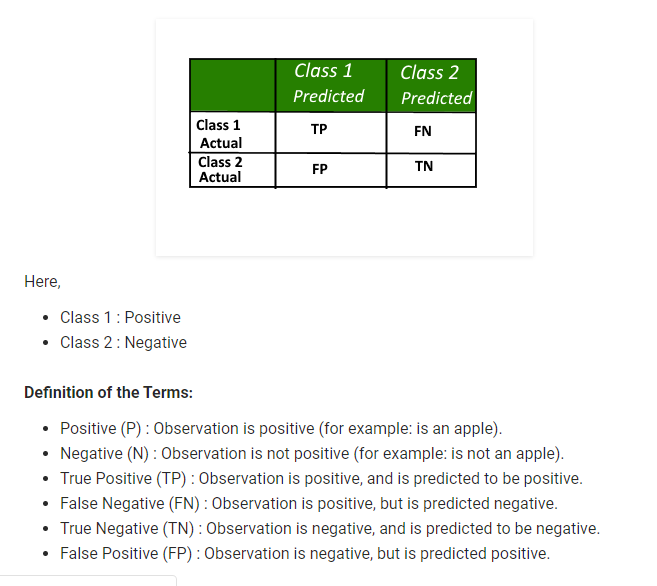

In this example, there are 155 True Positives, 2 False Negatives, 0 False Positives and 118 True Negatives.

Thus, here there are 2 cases of mis-classification.

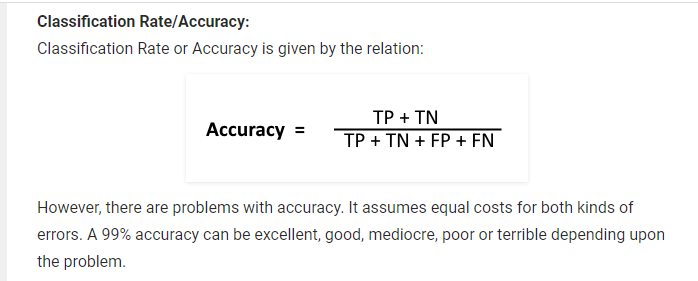

Here, accuracy = 99.27% which is extremely high. 

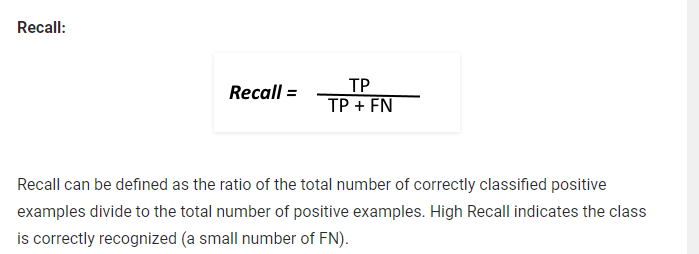

Here, recall = 98.726%

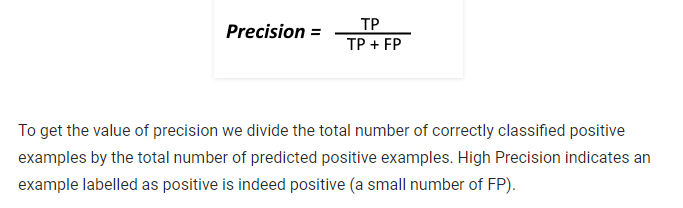

Here, precision = 100%

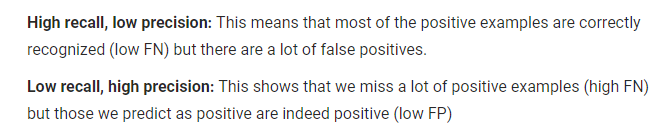

Here, we have high recall as well as high precision, so we can tell that our algorithm has done a good job.

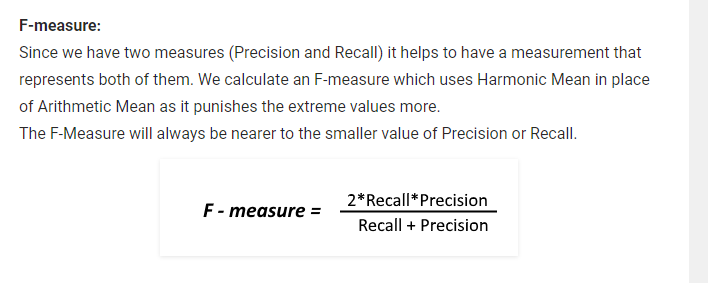

Here, F-measure = 0.993

# K-Nearest Neighbors Algorithm

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

Although, Nearest neighbor algorithms, for instance, the K-Nearest Neighbors (K-NN) for classification, are very “simple” algorithms, that’s not why they are called lazy ;). K-NN is a lazy learner because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead.

For example, the logistic regression algorithm learns its model weights (parameters) during training time. In contrast, there is no training time in K-NN. Although this may sound very convenient, this property doesn’t come without a cost: The “prediction” step in K-NN is relatively expensive! Each time we want to make a prediction, K-NN is searching for the nearest neighbor(s) in the entire training set! (Note that there are certain tricks such as BallTrees and KDtrees to speed this up a bit.)

To summarize: An eager learner has a model fitting or training step. A lazy learner does not have a training phase.

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

# KNN Model Representation

The model representation for KNN is the entire training dataset.

It is as simple as that.

KNN has no model other than storing the entire dataset, so there is no learning required.

Efficient implementations can store the data using complex data structures like k-d trees to make look-up and matching of new patterns during prediction efficient.

Because the entire training dataset is stored,we have to think carefully about the consistency of our training data. It might be a good idea to curate it, update it often as new data becomes available and remove erroneous and outlier data.

# Making Predictions with KNN

KNN makes predictions using the training dataset directly.

Predictions are made for a new instance (x) by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression this might be the mean output variable, in classification this might be the mode (or most common) class value.

To determine which of the K instances in the training dataset are most similar to a new input a distance measure is used. For real-valued input variables, the most popular distance measure is Euclidean distance.

Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.

EuclideanDistance(x, xi) = sqrt( sum( (xj – xij)^2 ) )

There are many other distance measures that can be used, such as Tanimoto, Jaccard, Mahalanobis and cosine distance. You can choose the best distance metric based on the properties of your data. If you are unsure, you can experiment with different distance metrics and different values of K together and see which mix results in the most accurate models.

Euclidean is a good distance measure to use if the input variables are similar in type (e.g. all measured widths and heights). Manhattan distance is a good measure to use if the input variables are not similar in type (such as age, gender, height, etc.).

The value for K can be found by algorithm tuning. It is a good idea to try many different values for K and see what works best for your problem.

The computational complexity of KNN increases with the size of the training dataset. For very large training sets, KNN can be made stochastic by taking a sample from the training dataset from which to calculate the K-most similar instances.

KNN has been around for a long time and has been very well studied. As such, different disciplines have different names for it, for example:

1. Instance-Based Learning: The raw training instances are used to make predictions. As such KNN is often referred to as instance-based learning or a case-based learning (where each training instance is a case from the problem domain).

2. Lazy Learning: No learning of the model is required and all of the work happens at the time a prediction is requested. As such, KNN is often referred to as a lazy learning algorithm.


3. Non-Parametric: KNN makes no assumptions about the functional form of the problem being solved. As such KNN is referred to as a non-parametric machine learning algorithm.

# KNN for Regression

When KNN is used for regression problems the prediction is based on the mean or the median of the K-most similar instances.

# KNN for Classification

When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.

Class probabilities can be calculated as the normalized frequency of samples that belong to each class in the set of K most similar instances for a new data instance. For example, in a binary classification problem (class is 0 or 1):

p(class=0) = count(class=0) / (count(class=0)+count(class=1))

If you are using K and you have an even number of classes (e.g. 2) it is a good idea to choose a K value with an odd number to avoid a tie. And the inverse, use an even number for K when you have an odd number of classes.

Ties can be broken consistently by expanding K by 1 and looking at the class of the next most similar instance in the training dataset.

# Curse of Dimensionality

KNN works well with a small number of input variables (p), but struggles when the number of inputs is very large.

Each input variable can be considered a dimension of a p-dimensional input space. For example, if you had two input variables x1 and x2, the input space would be 2-dimensional.

As the number of dimensions increases the volume of the input space increases at an exponential rate.

In high dimensions, points that may be similar may have very large distances. All points will be far away from each other and our intuition for distances in simple 2 and 3-dimensional spaces breaks down. This might feel unintuitive at first, but this general problem is called the “Curse of Dimensionality“.

The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience

# Best way of preparing data for KNN

1. Rescale Data: KNN performs much better if all of the data has the same scale. Normalizing your data to the range [0, 1] is a good idea. It may also be a good idea to standardize your data if it has a Gaussian distribution.

2. Address Missing Data: Missing data will mean that the distance between samples can not be calculated. These samples could be excluded or the missing values could be imputed.

3. Lower Dimensionality: KNN is suited for lower dimensional data. You can try it on high dimensional data (hundreds or thousands of input variables) but be aware that it may not perform as well as other techniques. KNN can benefit from feature selection that reduces the dimensionality of the input feature space. 

# Algorithm

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

1. Pick a value for K (i.e. 5).

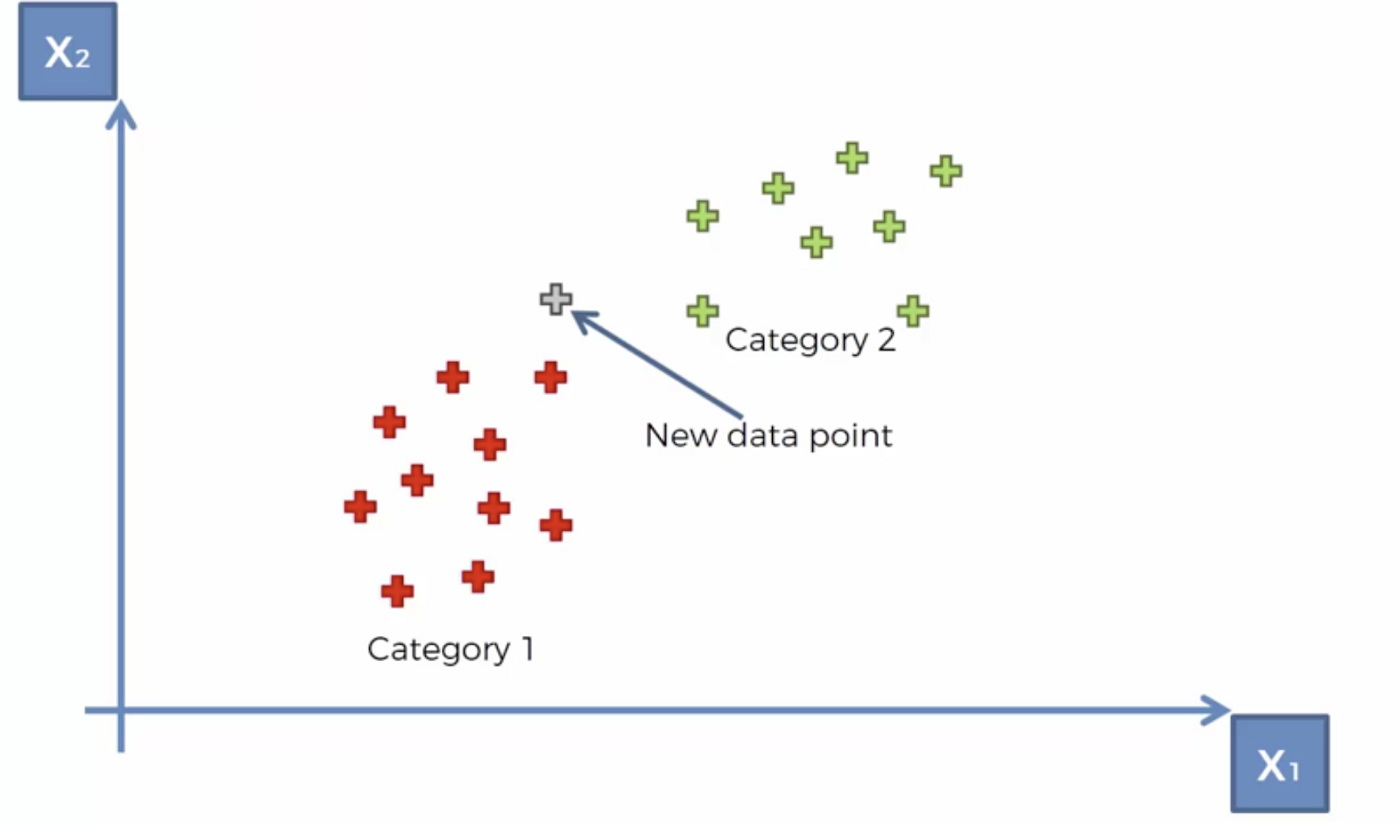

2. Take the K nearest neighbors of the new data point according to their Euclidean distance.

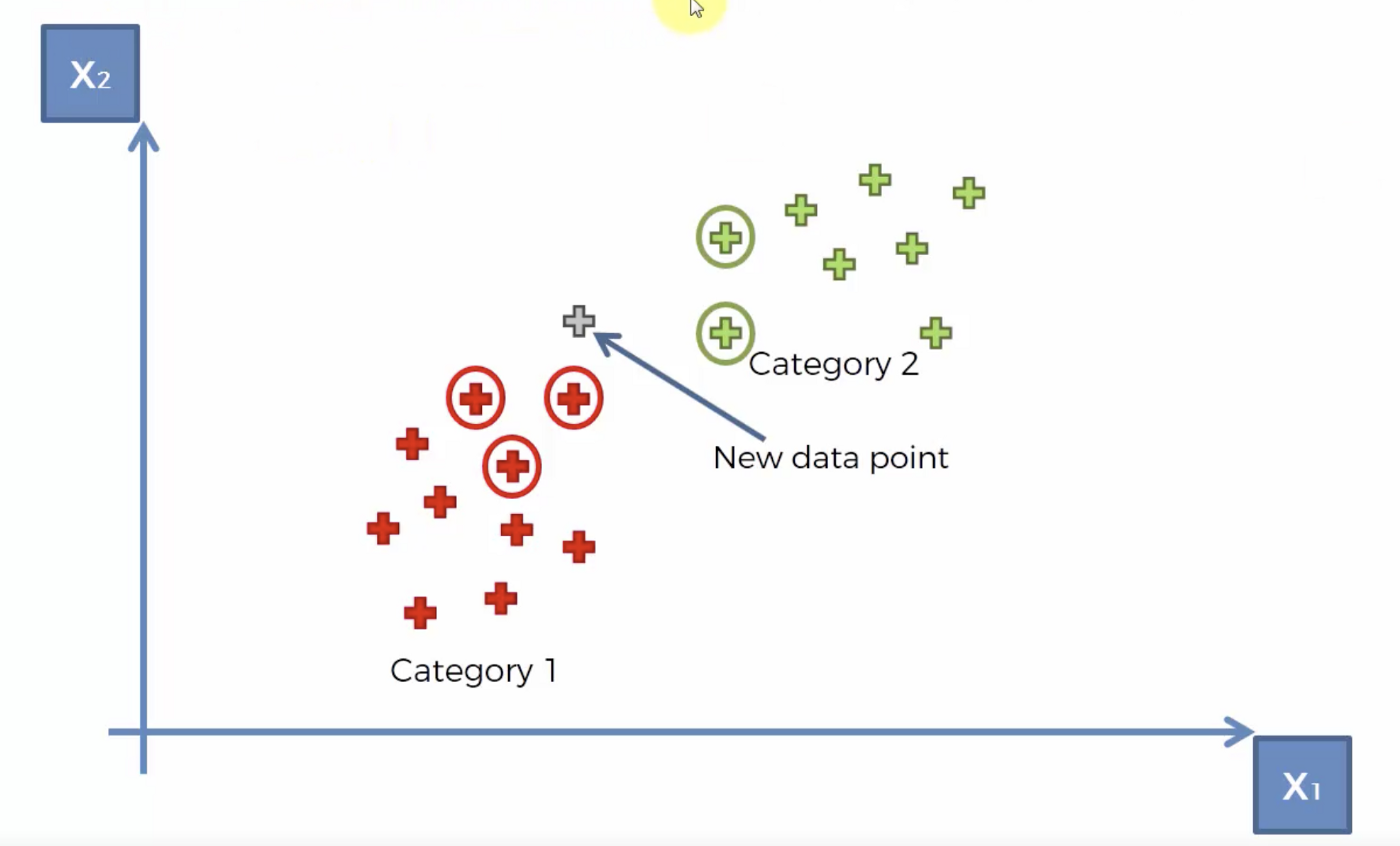

 3. Among these neighbors, count the number of data points in each category and assign the new data point to the category where you counted the most neighbors.


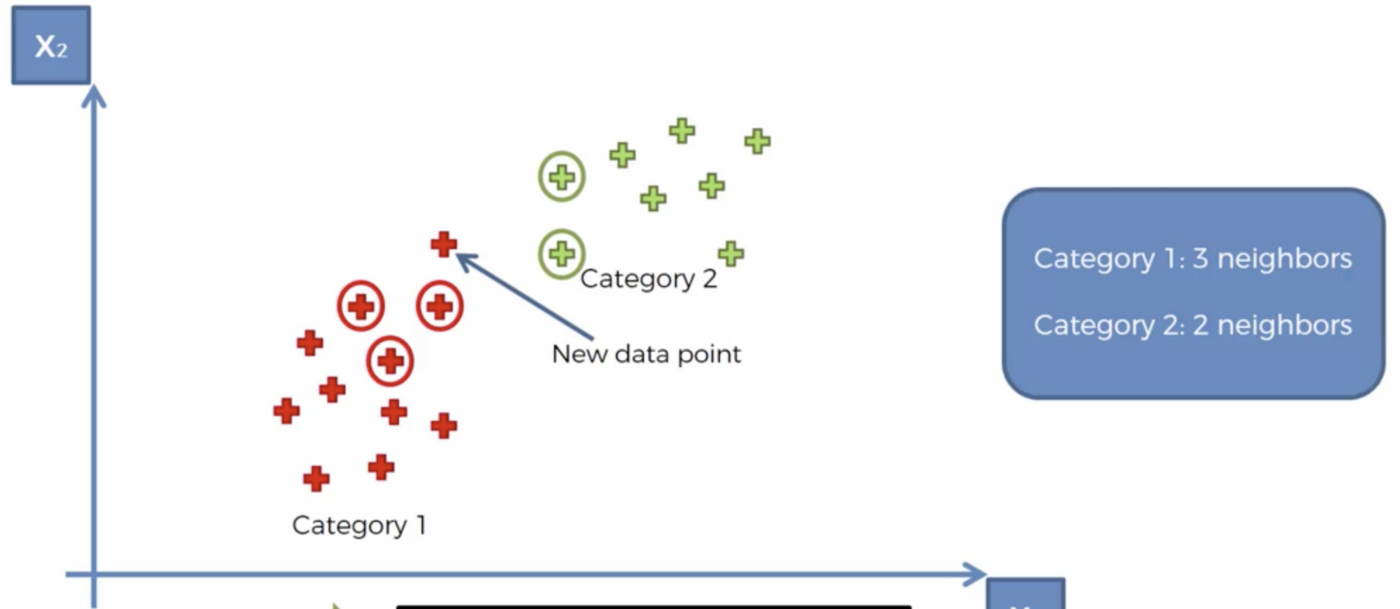

# Pros and Cons of KNN

In this section we'll present some of the pros and cons of using the KNN algorithm.

# Pros

1. It is extremely easy to implement

2. As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.

3. Since the algorithm requires no training before making predictions, new data can be added seamlessly.

4. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

# Cons

1. The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.

2. The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.

3. Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

# Implementing KNN Algorithm with Scikit-Learn

In this section, we will see how Python's Scikit-Learn library can be used to implement the KNN algorithm.

# The Dataset

We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica.

# Source of the dataset

Fisher, R. A. (1936) The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7, Part II, 179–188.

The data were collected by Anderson, Edgar (1935). The irises of the Gaspe Peninsula, Bulletin of the American Iris Society, 59, 2–5.

Here is a snapshot of our dataset

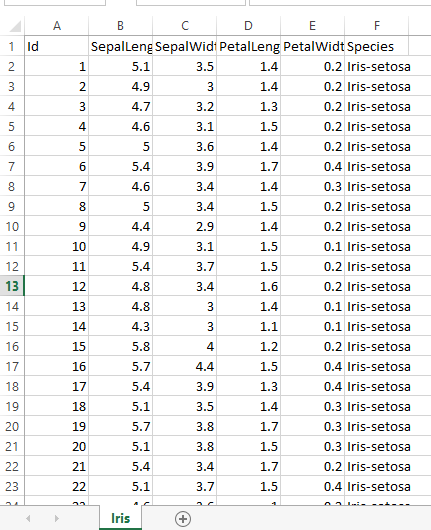

In [1]:
# Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow us to store and manipulate tabular data in rows of observations and columns of variables.

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [2]:
# Importing the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
# Assigning column names to the dataset

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
# Reading dataset to pandas dataframe

dataset = pd.read_csv(url, names=names)

To see what the dataset actually looks like, execute the following command:

In [5]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


dataset.head() returns the first 5 rows of the dataset. We can also specify the number of rows that we want to see by passing a number inside the head() function, for eg. dataset.head(10) will display the first 10 rows of the dataset

In [6]:
# Looking at the dimensions of the dataset

dataset.shape

(150, 5)

Thus, we have 150 rows and 5 columns in the dataset. The 5 columns comprise the 4 input features and 1 target variable.

In [7]:
# Taking a look at the descriptive statistics of the features

dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that the values in our dataset are not very well scaled. We will scale them down before training the algorithm.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

# Preprocessing

The next step is to split our dataset into its attributes and labels. To do so, we execute the following code:

In [8]:
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

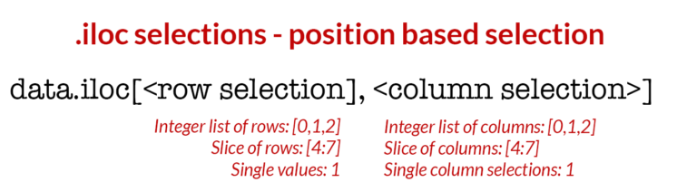

Alternatively, we can split the dataset by:

X = dataset.drop(['Class'],axis=1)

y = dataset['Class']

# Train Test Split

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means, KNN and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

# Feature Scaling

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

The following script performs feature scaling:

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.



In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data. To do so, we execute the following script:

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

# Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



The results show that our KNN algorithm performed quite well as a classifier in this problem using K=5. Although the algorithm performed quite well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

# Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in almost 100% accuracy.

One way to help us find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. We execute the following script:

In [15]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

In [18]:
error

[0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667]

The next step is to plot the error values against K values. We execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

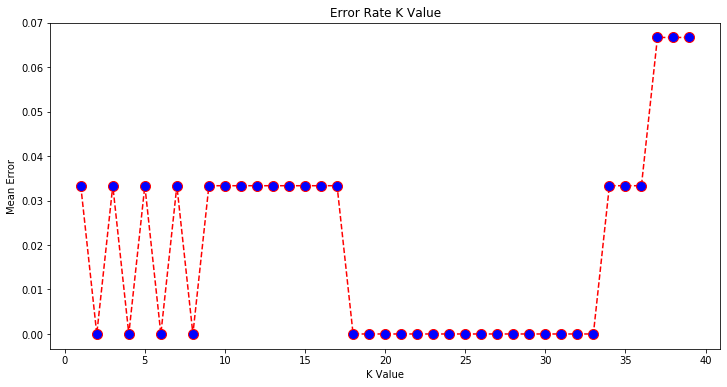

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output we can see that the mean error is zero when the values of the K are 2,4,6,8 and when the value of K is between 18 and 33. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.

# Conclusion

The K Nearest Neighbors algorithm doesn’t require any additional training when new data becomes available. Rather it determines the K closest points according to some distance metric (the samples must reside in memory). Then, it looks at the target label for each of the neighbors and places the new found data point into the same category as the majority. Given that KNN computes distance, it’s imperative that we scale our data. In addition, since KNN disregards the underlying features, it’s our responsibility to filter out any features that are deemed irrelevant.

# Applications of KNN

The following are some of the areas in which KNN can be applied successfully −

Banking System
KNN can be used in banking system to predict weather an individual is fit for loan approval. Does that individual have the characteristics similar to those of the defaulters?

Calculating Credit Ratings
KNN algorithms can be used to find an individual’s credit rating by comparing with the persons having similar traits.

Politics
With the help of KNN algorithms, we can classify a potential voter into various classes like “Will Vote”, “Will not Vote”.

Other areas in which KNN algorithm can be used are Speech Recognition, Handwriting Detection, Image Recognition and Video Recognition.